## Analyse exploratoire des données (EDA) – Détection de fraude

Ce notebook a pour objectif de préparer un modèle de **classification binaire** pour détecter les cas à risque de **chargeback (fraude / abus)** à partir du fichier `kaggle_b2_fraud_train_v3.csv`.

### Plan de l'EDA
1. Chargement des librairies et des données
2. Aperçu global du dataset
3. Distribution de la variable cible `target_is_fraud`
4. Analyse des valeurs manquantes
5. Statistiques descriptives des variables numériques
6. Visualisations univariées
7. Lien entre quelques variables et la fraude

### 1. Chargement des librairies et des données

Dans cette première partie, on charge les principales librairies de data science et le fichier `kaggle_b2_fraud_train_v3.csv` dans un DataFrame `df`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Options d'affichage
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("data/kaggle_b2_fraud_train_v3.csv")
df.head()

,customer_id,account_id,age,tenure_months,annual_income_eur,credit_score,num_transactions_30d,avg_amount_30d_eur,max_amount_30d_eur,days_since_last_login,support_tickets_90d,chargebacks_12m,failed_payments_6m,device_trust_z,ip_risk_z,is_vpn,num_devices_30d,is_new_device,channel,signup_source,plan_type,payment_method,browser,os,occupation,device_type,merchant_category,country,region,city,postal_code,last_ticket_subject,customer_note,referrer_code,signup_date,secondary_email,target_is_fraud,income_log,income_estimate_alt_eur,credit_score_norm,tx_amount_total_30d_eur,max_to_avg_ratio,internal_signal_1,internal_signal_2,internal_signal_3,internal_signal_4,internal_signal_5,internal_signal_6,internal_signal_7,internal_signal_8,terms_accepted_flag,partner_risk_indicator,manual_review_result,post_event_status_code,chargeback_resolution_time_days,legacy_partner_score
0,CUST_6O9Q8D4I36,ACC_TXXXTNEUVKFY,34,108,38635.01,544.0,20,60.92,80.16,4.9,1,0,1,-0.934,-0.355,0,1,0,mobile_app,ads_social,basic,card,Chrome,Android,public_sector,phone,groceries,FR,Bourgogne-Franche-Comté,Chalon-sur-Saône,3571,Password reset,shipping to new address,u166bcjl2b,2025-11-07,NaN,0,10.5619,39710.76,0.4436,1218.40,1.3158,-0.99355,-1.34156,-0.68676,-1.54627,0.39006,0.10963,0.55097,-0.56104,1,NaN,approve,0,7.9,NaN
1,CUST_FGUGTW230C,ACC_70VD7A4FFWCW,48,2,19912.97,703.0,21,112.11,571.12,0.3,0,0,0,-1.176,1.703,0,1,0,web,referral,standard,google_pay,Firefox,macOS,employee,phone,groceries,FR,Auvergne Rhone Alpes,Clermont-Ferrand,47810,Chargeback dispute,requested refund twice,aonnxfv6o0,2025-06-07,NaN,0,9.8992,20113.46,0.7327,2354.31,5.0943,-0.44874,0.23573,-0.17429,-0.00054,0.03265,-0.40256,0.36218,0.86583,1,NaN,approve,0,5.5,NaN
2,CUST_8ZI3LCBZ0W,ACC_AF53381QSC0L,27,0,20326.87,720.0,25,73.61,492.57,4.6,1,0,0,-0.482,1.020,0,1,0,partner_api,organic,basic,paypal,Chrome,Windows,self_employed,phone,groceries,FR,Occitanie,Nîmes,57537,Account locked,shipping to new address,i5wblveun2,2025-07-05,NaN,0,9.9197,20771.77,0.7636,1840.25,6.6916,-0.96850,-0.79478,-0.86064,-0.32183,-0.15637,0.57818,0.28902,-2.19864,1,NaN,approve,0,7.2,NaN
3,CUST_5MP3AR41CJ,ACC_U7WZGJ486LIV,45,49,38452.47,703.0,17,47.53,204.18,25.3,1,0,1,1.298,0.685,0,1,0,mobile_app,organic,basic,sepa,Chrome,Android,self_employed,phone,digital_services,FR,Île-de-France,Créteil,23660,Refund request,user reports suspicious login,77mvwhw8jj,2024-07-30,NaN,0,10.5572,37139.68,0.7327,808.01,4.2958,-0.25772,0.11514,-1.11761,1.35968,-1.02145,0.63908,-0.89190,-0.81592,1,NaN,approve,0,4.4,NaN
4,CUST_GNPL83JB0J,ACC_XW7DS3ED5J4Y,37,46,NaN,594.0,13,99.95,734.09,12.8,0,1,0,0.317,-1.930,0,1,0,web,ads_search,standard,sepa,Chrome,Android,employee,desktop,travel,FR,Occitanie,Toulouse,10494,Payment declined,normal usage pattern,sdhlx9jo4q,2025-05-21,NaN,0,10.0461,23259.21,0.5345,1299.35,7.3446,0.05269,-2.39518,0.11581,1.65795,-0.65771,0.08020,0.17606,0.86739,1,NaN,approve,0,4.9,NaN


In [3]:
df.head()

,customer_id,account_id,age,tenure_months,annual_income_eur,credit_score,num_transactions_30d,avg_amount_30d_eur,max_amount_30d_eur,days_since_last_login,support_tickets_90d,chargebacks_12m,failed_payments_6m,device_trust_z,ip_risk_z,is_vpn,num_devices_30d,is_new_device,channel,signup_source,plan_type,payment_method,browser,os,occupation,device_type,merchant_category,country,region,city,postal_code,last_ticket_subject,customer_note,referrer_code,signup_date,secondary_email,target_is_fraud,income_log,income_estimate_alt_eur,credit_score_norm,tx_amount_total_30d_eur,max_to_avg_ratio,internal_signal_1,internal_signal_2,internal_signal_3,internal_signal_4,internal_signal_5,internal_signal_6,internal_signal_7,internal_signal_8,terms_accepted_flag,partner_risk_indicator,manual_review_result,post_event_status_code,chargeback_resolution_time_days,legacy_partner_score
0,CUST_6O9Q8D4I36,ACC_TXXXTNEUVKFY,34,108,38635.01,544.0,20,60.92,80.16,4.9,1,0,1,-0.934,-0.355,0,1,0,mobile_app,ads_social,basic,card,Chrome,Android,public_sector,phone,groceries,FR,Bourgogne-Franche-Comté,Chalon-sur-Saône,3571,Password reset,shipping to new address,u166bcjl2b,2025-11-07,NaN,0,10.5619,39710.76,0.4436,1218.40,1.3158,-0.99355,-1.34156,-0.68676,-1.54627,0.39006,0.10963,0.55097,-0.56104,1,NaN,approve,0,7.9,NaN
1,CUST_FGUGTW230C,ACC_70VD7A4FFWCW,48,2,19912.97,703.0,21,112.11,571.12,0.3,0,0,0,-1.176,1.703,0,1,0,web,referral,standard,google_pay,Firefox,macOS,employee,phone,groceries,FR,Auvergne Rhone Alpes,Clermont-Ferrand,47810,Chargeback dispute,requested refund twice,aonnxfv6o0,2025-06-07,NaN,0,9.8992,20113.46,0.7327,2354.31,5.0943,-0.44874,0.23573,-0.17429,-0.00054,0.03265,-0.40256,0.36218,0.86583,1,NaN,approve,0,5.5,NaN
2,CUST_8ZI3LCBZ0W,ACC_AF53381QSC0L,27,0,20326.87,720.0,25,73.61,492.57,4.6,1,0,0,-0.482,1.020,0,1,0,partner_api,organic,basic,paypal,Chrome,Windows,self_employed,phone,groceries,FR,Occitanie,Nîmes,57537,Account locked,shipping to new address,i5wblveun2,2025-07-05,NaN,0,9.9197,20771.77,0.7636,1840.25,6.6916,-0.96850,-0.79478,-0.86064,-0.32183,-0.15637,0.57818,0.28902,-2.19864,1,NaN,approve,0,7.2,NaN
3,CUST_5MP3AR41CJ,ACC_U7WZGJ486LIV,45,49,38452.47,703.0,17,47.53,204.18,25.3,1,0,1,1.298,0.685,0,1,0,mobile_app,organic,basic,sepa,Chrome,Android,self_employed,phone,digital_services,FR,Île-de-France,Créteil,23660,Refund request,user reports suspicious login,77mvwhw8jj,2024-07-30,NaN,0,10.5572,37139.68,0.7327,808.01,4.2958,-0.25772,0.11514,-1.11761,1.35968,-1.02145,0.63908,-0.89190,-0.81592,1,NaN,approve,0,4.4,NaN
4,CUST_GNPL83JB0J,ACC_XW7DS3ED5J4Y,37,46,NaN,594.0,13,99.95,734.09,12.8,0,1,0,0.317,-1.930,0,1,0,web,ads_search,standard,sepa,Chrome,Android,employee,desktop,travel,FR,Occitanie,Toulouse,10494,Payment declined,normal usage pattern,sdhlx9jo4q,2025-05-21,NaN,0,10.0461,23259.21,0.5345,1299.35,7.3446,0.05269,-2.39518,0.11581,1.65795,-0.65771,0.08020,0.17606,0.86739,1,NaN,approve,0,4.9,NaN


### 2. Aperçu global du dataset

Dans cette section, on regarde :
- **La taille du dataset** (`shape`) : nombre de lignes et de colonnes.
- **Les types de variables** (`dtypes`) : pour distinguer numériques / catégorielles / dates.
- Un résumé avec `info()` pour voir rapidement les **valeurs manquantes** et les types.

Exécuter ensuite les cellules de code ci-dessous pour afficher ces informations.

In [4]:
# Aperçu de la taille du dataset
print("Shape (nb_lignes, nb_colonnes) :", df.shape)

# Types de variables
df.dtypes.head(30)

Shape (nb_lignes, nb_colonnes) : (160000, 56)


customer_id               object
account_id                object
age                        int64
tenure_months              int64
annual_income_eur        float64
credit_score             float64
num_transactions_30d       int64
avg_amount_30d_eur       float64
max_amount_30d_eur       float64
days_since_last_login    float64
support_tickets_90d        int64
chargebacks_12m            int64
failed_payments_6m         int64
device_trust_z           float64
ip_risk_z                float64
is_vpn                     int64
num_devices_30d            int64
is_new_device              int64
channel                   object
signup_source             object
plan_type                 object
payment_method            object
browser                   object
os                        object
occupation                object
device_type               object
merchant_category         object
country                   object
region                    object
city                      object
dtype: obj

In [5]:
# Résumé global : info() pour voir types et valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      160000 non-null  object 
 1   account_id                       160000 non-null  object 
 2   age                              160000 non-null  int64  
 3   tenure_months                    160000 non-null  int64  
 4   annual_income_eur                148814 non-null  float64
 5   credit_score                     152048 non-null  float64
 6   num_transactions_30d             160000 non-null  int64  
 7   avg_amount_30d_eur               150453 non-null  float64
 8   max_amount_30d_eur               152077 non-null  float64
 9   days_since_last_login            160000 non-null  float64
 10  support_tickets_90d              160000 non-null  int64  
 11  chargebacks_12m                  160000 non-null  int64  
 12  fa

### 3. Distribution de la variable cible `target_is_fraud`

Avant d'aller plus loin, il est important de regarder la **répartition de la cible** (fraude vs non fraude) :
- Nombre d'observations par classe.
- Pourcentage de chaque classe.

Cela permet d'identifier un éventuel **déséquilibre de classes**, ce qui est fréquent en détection de fraude.

In [6]:
# Distribution de la cible target_is_fraud

# Comptage brut
print("Comptage par classe :")
print(df["target_is_fraud"].value_counts(dropna=False))

# Pourcentages
print("\nPourcentage par classe (%):")
print((df["target_is_fraud"].value_counts(normalize=True) * 100).round(2))

Comptage par classe :
target_is_fraud
0    155076
1      4924
Name: count, dtype: int64

Pourcentage par classe (%):
target_is_fraud
0    96.92
1     3.08
Name: proportion, dtype: float64


### 4. Analyse des valeurs manquantes

Les données de ce projet contiennent volontairement des **valeurs manquantes**. Il est donc important de :
- Quantifier le **nombre** et le **pourcentage** de valeurs manquantes par variable.
- Identifier les variables très incomplètes (par exemple > 30–40 % de NA), qui pourront nécessiter un traitement spécifique (imputation avancée, suppression, encodage particulier...).

La cellule suivante calcule un tableau synthétique des valeurs manquantes.

In [7]:
# Tableau des valeurs manquantes

missing_df = df.isna().sum().to_frame(name="nb_na")
missing_df["pct_na"] = (missing_df["nb_na"] / len(df) * 100).round(2)

# Tri des variables les plus manquantes en premier
missing_df_sorted = missing_df.sort_values("pct_na", ascending=False)
missing_df_sorted.head(30)  # on affiche les 30 variables les plus incomplètes

,nb_na,pct_na
partner_risk_indicator,155249,97.03
legacy_partner_score,153736,96.08
secondary_email,147391,92.12
region,45240,28.28
annual_income_eur,11186,6.99
avg_amount_30d_eur,9547,5.97
credit_score,7952,4.97
max_amount_30d_eur,7923,4.95
device_trust_z,6384,3.99
customer_note,4802,3.00


### 5. Statistiques descriptives des variables numériques

On regarde ici les principales **statistiques descriptives** (moyenne, écart-type, min, max, quantiles) pour les variables numériques, afin de :
- repérer des **ordres de grandeur** (par exemple montants, âges, durées) ;
- détecter des **valeurs extrêmes (outliers potentiels)** ;
- comparer ensuite ces distributions entre classes de fraude / non fraude.

In [8]:
# Séparation simple entre variables numériques et non numériques

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("Nombre de variables numériques :", len(numeric_cols))
print("Quelques variables numériques :", list(numeric_cols[:15]))

# Statistiques descriptives pour les variables numériques
stats_num = df[numeric_cols].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T
stats_num

Nombre de variables numériques : 36
Quelques variables numériques : ['age', 'tenure_months', 'annual_income_eur', 'credit_score', 'num_transactions_30d', 'avg_amount_30d_eur', 'max_amount_30d_eur', 'days_since_last_login', 'support_tickets_90d', 'chargebacks_12m', 'failed_payments_6m', 'device_trust_z', 'ip_risk_z', 'is_vpn', 'num_devices_30d']


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
age,160000.0,38.239075,11.751027,-14.000000,18.000000,18.000000,30.000000,38.000000,46.000000,58.000000,66.000000,1.590000e+02
tenure_months,160000.0,17.898356,17.781320,-23.000000,0.000000,1.000000,5.000000,12.000000,25.000000,53.000000,82.000000,1.200000e+02
annual_income_eur,148814.0,37610.707341,26937.658309,-19941.709231,8703.103800,12858.858000,22048.442500,31943.140000,46450.790000,79358.715000,118195.524000,1.355012e+06
credit_score,152048.0,670.067327,59.985184,380.000000,530.000000,571.000000,630.000000,670.000000,710.000000,769.000000,810.000000,8.500000e+02
num_transactions_30d,160000.0,22.901775,34.776594,5.000000,12.000000,15.000000,19.000000,22.000000,25.000000,30.000000,34.000000,1.923000e+03
avg_amount_30d_eur,150453.0,61.626094,41.795545,-49.675409,5.320000,12.190000,30.970000,52.540000,82.370000,142.464000,197.748800,4.171000e+02
max_amount_30d_eur,152077.0,298.683078,256.039318,0.610000,17.410000,40.720000,117.380000,224.730000,402.170000,807.974000,1200.132400,2.994200e+03
days_since_last_login,160000.0,12.019874,12.033636,0.000000,0.100000,0.600000,3.500000,8.300000,16.700000,36.100000,55.400000,1.846000e+02
support_tickets_90d,160000.0,0.797850,0.894715,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,7.000000e+00
chargebacks_12m,160000.0,0.049931,0.223217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000e+00


### 6. Visualisations univariées

Pour mieux comprendre les distributions, on trace quelques **histogrammes** pour les variables numériques clés et des **diagrammes en barres** pour certaines variables catégorielles.

> Remarque : ces visualisations sont surtout exploratoires ; elles serviront à repérer des formes de distribution particulières (asymétrie, queues lourdes, multimodalité) et des valeurs extrêmes.

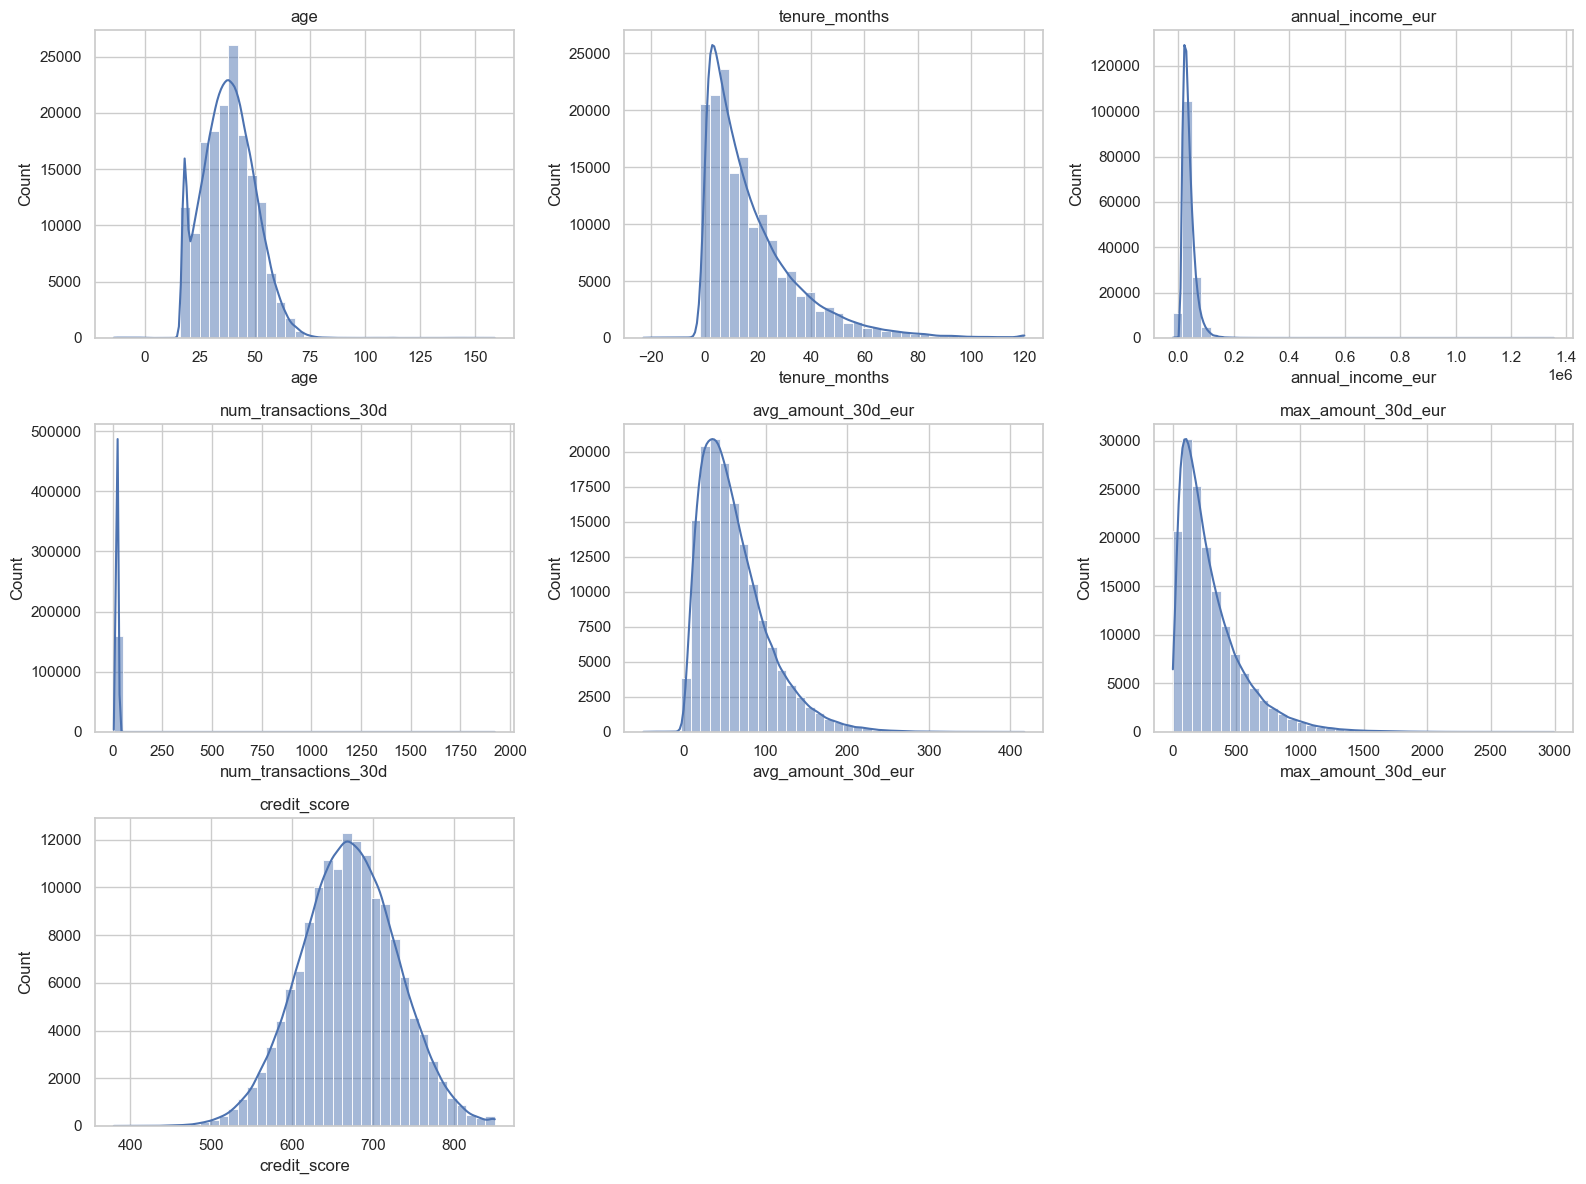

In [9]:
# Histogrammes pour quelques variables numériques importantes

numeric_features_to_plot = [
    "age",
    "tenure_months",
    "annual_income_eur",
    "num_transactions_30d",
    "avg_amount_30d_eur",
    "max_amount_30d_eur",
    "credit_score",
]

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_features_to_plot, 1):
    if col in df.columns:
        plt.subplot(3, 3, i)
        sns.histplot(df[col], kde=True, bins=40)
        plt.title(col)
plt.tight_layout()
plt.show()

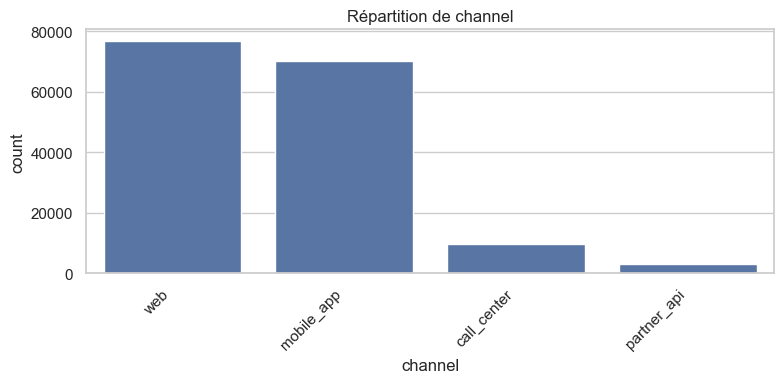

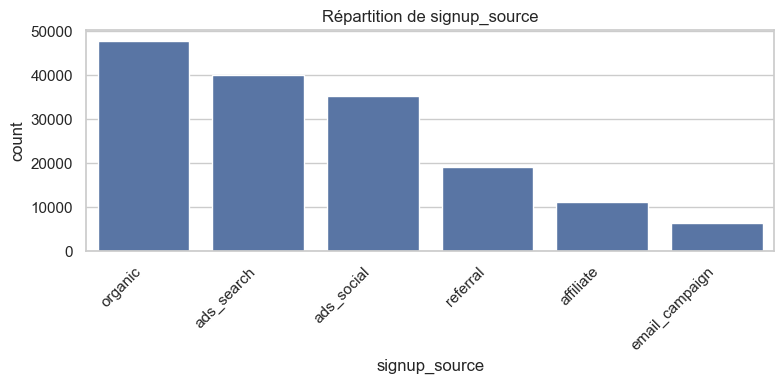

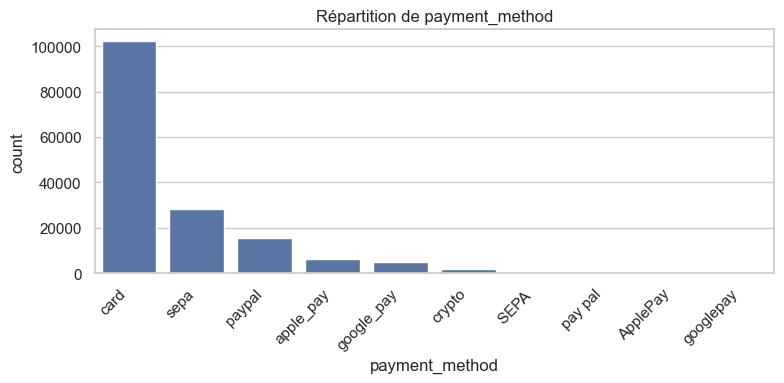

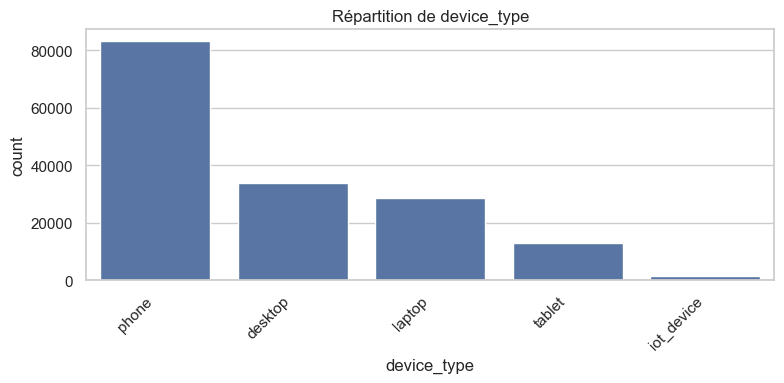

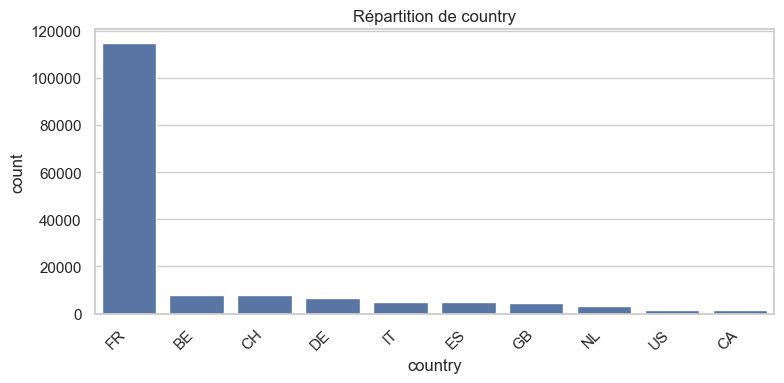

In [10]:
# Diagrammes en barres pour quelques variables catégorielles (top catégories)

categorical_features_to_plot = [
    "channel",
    "signup_source",
    "payment_method",
    "device_type",
    "country",
]

for col in categorical_features_to_plot:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        # On limite aux 10 catégories les plus fréquentes pour la lisibilité
        order = df[col].value_counts().head(10).index
        sns.countplot(data=df, x=col, order=order)
        plt.title(f"Répartition de {col}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

### 7. Lien entre quelques variables et la fraude

On commence à regarder de manière très simple comment certaines variables sont liées à la cible `target_is_fraud` :
- pour les variables numériques : comparaison des distributions par classe (boxplots) ;
- pour les variables catégorielles : taux de fraude par catégorie (barplots du pourcentage de 1).

Ces analyses restent préliminaires mais donnent des **pistes** pour le futur feature engineering et le choix des variables pertinentes.

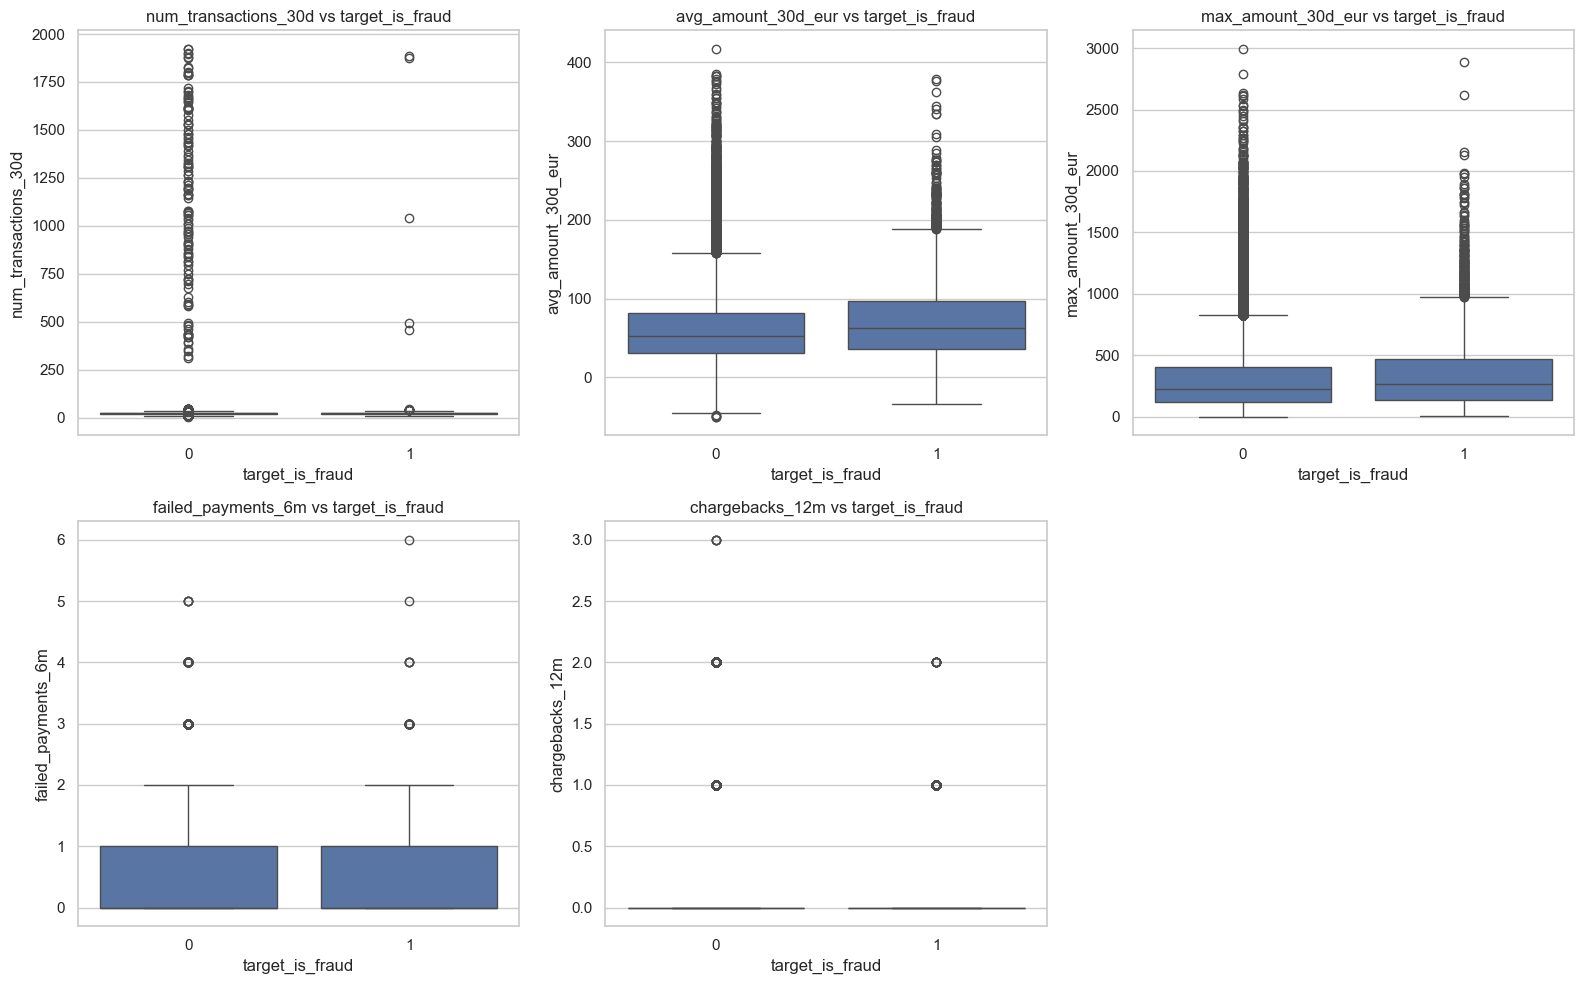

In [11]:
# Boxplots de variables numériques par rapport à la fraude

num_for_fraud = [
    "num_transactions_30d",
    "avg_amount_30d_eur",
    "max_amount_30d_eur",
    "failed_payments_6m",
    "chargebacks_12m",
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_for_fraud, 1):
    if col in df.columns:
        plt.subplot(2, 3, i)
        sns.boxplot(data=df, x="target_is_fraud", y=col)
        plt.title(f"{col} vs target_is_fraud")
plt.tight_layout()
plt.show()

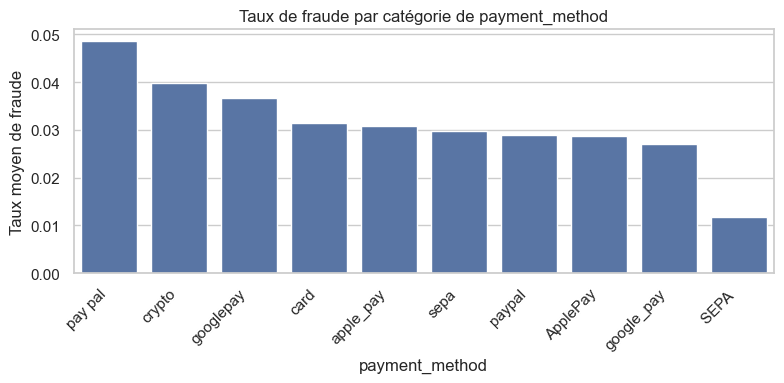

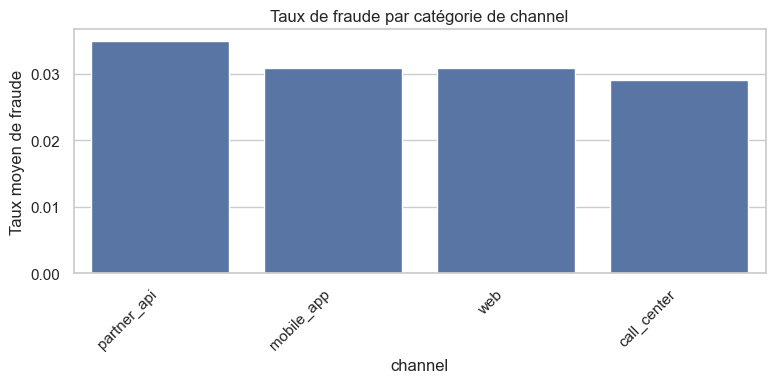

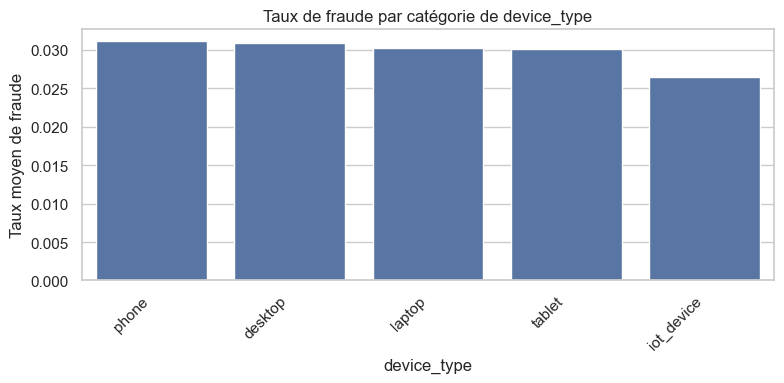

In [12]:
# Taux de fraude par catégorie pour quelques variables catégorielles

cat_for_fraud = [
    "payment_method",
    "channel",
    "device_type",
]

for col in cat_for_fraud:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        # Calcul du taux moyen de fraude par catégorie
        fraud_rate = df.groupby(col)["target_is_fraud"].mean().sort_values(ascending=False)
        fraud_rate = fraud_rate.head(10)  # top 10 par taux de fraude
        sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
        plt.ylabel("Taux moyen de fraude")
        plt.title(f"Taux de fraude par catégorie de {col}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

### 8. Synthèse de l'analyse exploratoire (EDA)

**Taille et structure du jeu de données**  
Le dataset `kaggle_b2_fraud_train_v3.csv` contient un grand nombre d'observations et de variables, avec un mélange de :
- variables **numériques** (ex. `age`, `tenure_months`, `annual_income_eur`, `num_transactions_30d`, `avg_amount_30d_eur`, `max_amount_30d_eur`, `credit_score`, signaux internes) ;
- variables **catégorielles** (ex. `channel`, `signup_source`, `payment_method`, `device_type`, `browser`, `os`, `country`, `region`, `occupation`, etc.) ;
- une **cible binaire** `target_is_fraud`.

**Cible `target_is_fraud`**  
La distribution de la cible montre un **déséquilibre de classes** typique des problèmes de fraude : la classe "non fraude" domine largement, tandis que la classe "fraude" représente une proportion beaucoup plus faible des observations.  
→ Cela impliquera probablement :
- d'utiliser des **métriques adaptées** (AUC, rappel, F1, precision-recall, etc.) plutôt que l'accuracy seule ;
- de considérer des **stratégies de rééquilibrage** (pondération des classes, sur-/sous-échantillonnage) lors de la modélisation.

**Qualité des données et valeurs manquantes**  
L'analyse des valeurs manquantes met en évidence :
- des variables avec **peu ou pas de valeurs manquantes**, faciles à exploiter ;
- quelques variables avec un **taux de NA plus élevé**, qui demanderont un traitement spécifique (imputation numérique, catégorie "manquant", ou éventuellement suppression si la variable est trop incomplète et peu informative).

**Distribution des variables numériques**  
Les statistiques descriptives et les histogrammes montrent que :
- certaines variables (revenu, montants de transaction, signaux internes) présentent des **distributions asymétriques** avec des queues longues et des **valeurs extrêmes (outliers potentiels)** ;
- les échelles sont très différentes d'une variable à l'autre (par ex. nombre de transactions vs montants en euros), ce qui plaide pour une **normalisation / standardisation** avant certains modèles (k-NN, modèles linéaires, etc.).

**Variables catégorielles et comportement client**  
Les countplots mettent en évidence :
- des canaux (`channel`) et sources d'inscription (`signup_source`) dominants (web, mobile_app, organic, ads, etc.) ;
- une diversité de `payment_method`, `device_type`, `country` et `occupation`, qui peuvent être fortement liés au risque de fraude.

**Lien préliminaire avec la fraude**  
Les boxplots et taux de fraude par catégorie suggèrent que :
- certaines variables numériques (par exemple `failed_payments_6m`, `chargebacks_12m`, montants de transactions) sont **plus élevées en moyenne** pour la classe fraude ;
- certaines modalités catégorielles (certains `payment_method`, `channel`, `device_type`, etc.) présentent un **taux de fraude moyen plus élevé** que d'autres.

Ces observations restent exploratoires, mais elles donnent déjà des **pistes pour le feature engineering** (création de nouvelles variables, encodage des catégories, transformations des montants, agrégations temporelles, etc.) et pour la **sélection des variables** à tester dans les modèles.

Dans la suite du projet, on pourra :
- définir une stratégie de **nettoyage / préparation** (traitement des NA, suppression/encodage de variables, gestion des outliers) ;
- construire des **features dérivées** pertinentes (ratios, historiques, interactions) ;
- tester différents **modèles de classification** avec un choix de seuil adapté au contexte métier (coût d'un faux négatif vs faux positif).